## Learning with Massive Data
### Assignment 1 - Parallel graph's triangle counter
#### Giovanni Costa - 880892

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import glob

### Data import

In [2]:
files=glob.glob("results/*.csv")
print(files)

['results/facebook-combined_results.csv', 'results/as-skitter_results.csv', 'results/custom-dense_results.csv']


In [3]:
df_little=pd.read_csv(files[0], header=0)
df_sparse=pd.read_csv(files[1], header=0)
df_dense=pd.read_csv(files[2], header=0)

In [4]:
df_little.head(3)

,n_nodes,n_edges,density,num_threads,rank_time,triangle_time
0,4039,88234,0.01082,1,0.043124,0.043069
1,4039,88234,0.01082,2,0.047370,0.016862
2,4039,88234,0.01082,3,0.052685,0.017188


In [5]:
df_sparse.head(3)

,n_nodes,n_edges,density,num_threads,rank_time,triangle_time
0,1696415,11095298,0.000008,1,22.862651,4.015351
1,1696415,11095298,0.000008,2,18.252170,3.523903
2,1696415,11095298,0.000008,3,18.948504,3.212515


In [6]:
df_dense.head(3)

,n_nodes,n_edges,density,num_threads,rank_time,triangle_time
0,4039,8097333,0.99296,1,6.042392,59.776048
1,4039,8097333,0.99296,2,5.598869,31.969577
2,4039,8097333,0.99296,3,4.996925,22.481564


### Empirical evaluation

In [7]:
def compute_speedup(df: pd.DataFrame):
    df['total_time']=df['rank_time']+df['triangle_time']
    seq_value=df.query("num_threads==1")['total_time']
    df['tot_speedup']=float(seq_value)/df['total_time']

    seq_value=np.mean(df.query("num_threads==1")['triangle_time'])
    df["tr_speedup"]=float(seq_value)/df['triangle_time']

    seq_value=np.mean(df.query("num_threads==1")['rank_time'])
    df["rank_speedup"]=float(seq_value)/df['rank_time']
    

def plot_alg(df: pd.DataFrame):
    plt.figure(figsize=(4, 3))
    #graph=sns.lineplot(data=tmp_df, x="num_threads", y="speedup", markers=True)
    plt.title('Parallel algorithm performance')
    plt.ylabel('Speedup')
    plt.xlabel('Number of threads')

    max_thread=df["num_threads"].max()
    max_y=int(max(df["tot_speedup"].max(), df["tr_speedup"].max(), df["rank_speedup"].max()))+1
    plt.xlim(0, max_thread)
    plt.ylim(0, max_y)

    thread_plot_col=[0]+df["num_threads"].tolist()
    tot_speedup_plot_col=[0]+df["tot_speedup"].tolist()
    tr_speedup_plot_col=[0]+df["tr_speedup"].tolist()
    rank_speedup_plot_col=[0]+df["rank_speedup"].tolist()
    plt.xticks(thread_plot_col)
    plt.yticks(thread_plot_col)

    plt.plot(thread_plot_col, thread_plot_col, color='#F52900', label="Linear speedup")
    plt.fill_between(thread_plot_col,
                    [1],
                    alpha=0.3,color="black",label="No improvement zone")
    plt.fill_between(thread_plot_col,
                    thread_plot_col,
                    alpha=0.1,color="red",label="Sublinear zone")
    plt.fill_between(thread_plot_col,
                    thread_plot_col,
                    max_thread, alpha=0.1, color="green", label="Superlinear zone")

    plt.plot(thread_plot_col, rank_speedup_plot_col,
                '-x',label="RankByDeg speedup",color="#264653")
    plt.plot(thread_plot_col, tr_speedup_plot_col,
                '-x',label="Tr. counting speedup", color="#2a9d8f")
    plt.plot(thread_plot_col, tot_speedup_plot_col,
                '-x',label="Total speedup", color="#f4a261")

    plt.grid()
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), prop={'size': 8})
    plt.show()

#### Little dataframe

In [8]:
df_little=df_little.groupby("num_threads").mean().reset_index()
compute_speedup(df_little)

In [9]:
df_little.drop(columns=["n_nodes","n_edges","density"])

,num_threads,rank_time,triangle_time,total_time,tot_speedup,tr_speedup,rank_speedup
0,1,0.057035,0.032774,0.089809,1.000000,1.000000,1.000000
1,2,0.043300,0.017180,0.060480,1.484937,1.907703,1.317198
2,3,0.048294,0.015550,0.063844,1.406687,2.107674,1.180981
3,4,0.080075,0.014215,0.094291,0.952470,2.305562,0.712263
4,5,0.071742,0.014429,0.086172,1.042210,2.271369,0.794993
5,6,0.116103,0.016016,0.132119,0.679758,2.046392,0.491241
6,7,0.115298,0.012260,0.127558,0.704064,2.673201,0.494673
7,8,0.189834,0.014421,0.204255,0.439691,2.272681,0.300445


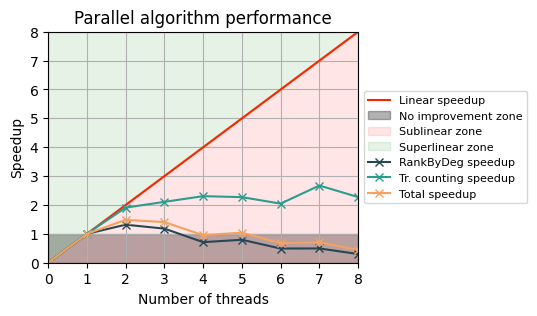

In [10]:
plot_alg(df_little)

In [11]:
print("MAX speedup score:")
print(df_little.iloc[np.argmax(df_little['tot_speedup'])], '\n')
print("MIN speedup score:")
print(df_little.iloc[np.argmin(df_little['tot_speedup'])], '\n')

MAX speedup score:
num_threads          2.000000
n_nodes           4039.000000
n_edges          88234.000000
density              0.010820
rank_time            0.043300
triangle_time        0.017180
total_time           0.060480
tot_speedup          1.484937
tr_speedup           1.907703
rank_speedup         1.317198
Name: 1, dtype: float64 

MIN speedup score:
num_threads          8.000000
n_nodes           4039.000000
n_edges          88234.000000
density              0.010820
rank_time            0.189834
triangle_time        0.014421
total_time           0.204255
tot_speedup          0.439691
tr_speedup           2.272681
rank_speedup         0.300445
Name: 7, dtype: float64 



#### Sparse dataframe

In [12]:
df_sparse=df_sparse.groupby("num_threads").mean().reset_index()
compute_speedup(df_sparse)

In [13]:
df_sparse.drop(columns=["n_nodes","n_edges","density"])

,num_threads,rank_time,triangle_time,total_time,tot_speedup,tr_speedup,rank_speedup
0,1,22.887661,4.118983,27.006643,1.000000,1.000000,1.000000
1,2,17.439197,3.327904,20.767101,1.300453,1.237711,1.312426
2,3,17.522407,3.158543,20.680950,1.305871,1.304077,1.306194
3,4,17.495614,3.101340,20.596955,1.311196,1.328130,1.308194
4,5,18.639517,3.165826,21.805342,1.238533,1.301077,1.227911
5,6,19.955419,3.267651,23.223070,1.162923,1.260533,1.146940
6,7,21.740516,3.297135,25.037651,1.078641,1.249261,1.052765
7,8,22.798104,3.551059,26.349163,1.024953,1.159931,1.003928


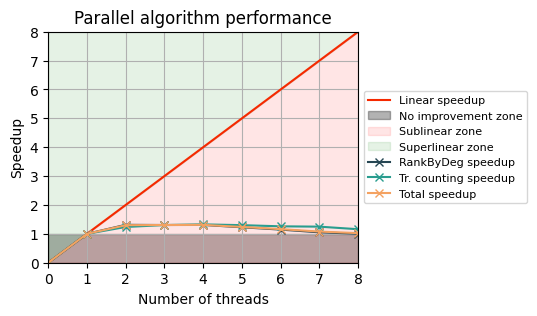

In [14]:
plot_alg(df_sparse)

In [15]:
print("MAX speedup score:")
print(df_sparse.iloc[np.argmax(df_sparse['tot_speedup'])], '\n')
print("MIN speedup score:")
print(df_sparse.iloc[np.argmin(df_sparse['tot_speedup'])], '\n')

MAX speedup score:
num_threads      4.000000e+00
n_nodes          1.696415e+06
n_edges          1.109530e+07
density          8.000000e-06
rank_time        1.749561e+01
triangle_time    3.101340e+00
total_time       2.059695e+01
tot_speedup      1.311196e+00
tr_speedup       1.328130e+00
rank_speedup     1.308194e+00
Name: 3, dtype: float64 

MIN speedup score:
num_threads      1.000000e+00
n_nodes          1.696415e+06
n_edges          1.109530e+07
density          8.000000e-06
rank_time        2.288766e+01
triangle_time    4.118983e+00
total_time       2.700664e+01
tot_speedup      1.000000e+00
tr_speedup       1.000000e+00
rank_speedup     1.000000e+00
Name: 0, dtype: float64 



#### Dense dataframe

In [16]:
df_dense=df_dense.groupby("num_threads").mean().reset_index()
compute_speedup(df_dense)

In [17]:
df_dense.drop(columns=["n_nodes","n_edges","density"])

,num_threads,rank_time,triangle_time,total_time,tot_speedup,tr_speedup,rank_speedup
0,1,5.319509,58.178828,63.498337,1.000000,1.000000,1.000000
1,2,5.137820,32.433768,37.571588,1.690063,1.793773,1.035363
2,3,5.323145,23.573072,28.896217,2.197462,2.468021,0.999317
3,4,5.695028,19.017406,24.712434,2.569489,3.059241,0.934062
4,5,5.957898,15.650575,21.608473,2.938585,3.717361,0.892850
5,6,6.822103,13.886422,20.708524,3.066290,4.189620,0.779746
6,7,7.214096,12.083721,19.297816,3.290442,4.814645,0.737377
7,8,7.578402,11.179902,18.758304,3.385079,5.203876,0.701930


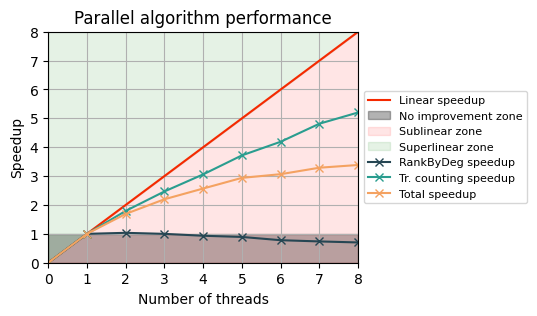

In [18]:
plot_alg(df_dense)

In [19]:
print("MAX speedup score:")
print(df_dense.iloc[np.argmax(df_dense['tot_speedup'])], '\n')
print("MIN speedup score:")
print(df_dense.iloc[np.argmin(df_dense['tot_speedup'])], '\n')

MAX speedup score:
num_threads      8.000000e+00
n_nodes          4.039000e+03
n_edges          8.097333e+06
density          9.929600e-01
rank_time        7.578402e+00
triangle_time    1.117990e+01
total_time       1.875830e+01
tot_speedup      3.385079e+00
tr_speedup       5.203876e+00
rank_speedup     7.019302e-01
Name: 7, dtype: float64 

MIN speedup score:
num_threads      1.000000e+00
n_nodes          4.039000e+03
n_edges          8.097333e+06
density          9.929600e-01
rank_time        5.319509e+00
triangle_time    5.817883e+01
total_time       6.349834e+01
tot_speedup      1.000000e+00
tr_speedup       1.000000e+00
rank_speedup     1.000000e+00
Name: 0, dtype: float64 

